

# Project: Investigate TMDb_Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I'll use it to answer these questions.   

##### Questions for Analysis

##### Q1: Which month is consider more Revenues for movies show?
##### Q 2: What's The Relation Between Revenue & Budget?
##### Q3: What is the Relationship between Runtime & Vote Average?
##### Q4: What kind of properties are associated with movies that have high revenues?
##### Q5: Which genres are most popular?
##### Q6: What's the top 10 movies profit?
##### Q7: Which genres are most revenue?

In [1]:
#importing important files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

In [5]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

Load The Dataset, Explore Data, Check for (missing data, null data, duplicates, unused columns, and wrong type). Fix and remove all data to be ready for processing.

In [2]:
# Loading tmdb-movies.csv file and printing out a few lines
df= pd.read_csv('tmdb-movies.csv')
df.head(3)             

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#displaying no. of columns and rows
df.shape

(10866, 21)

In [4]:
#taking overview about data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Checking statics of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning: Drop Unused Columns  

Get rid of columns are not used for answering questions(Budget, Revenue, Cast, Homepage, Director, Tagline, Keywords, Overview, and Release_year)

In [6]:
#dropping column that not use and display used one
df.drop(['budget', 'revenue','cast', 'homepage', 'director','tagline','keywords','overview','release_year'], axis=1,inplace=True)
df.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'budget_adj', 'revenue_adj'],
      dtype='object')

#### Check for null values in columns to fill or remove to prepare data for processing 

In [7]:
#sum of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
original_title             0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

Calculating mean values for all columns to use for replacing null and zero values,
filling null values by mean.

In [8]:
#calculating mean and filling null by mean value
mean = df.mean()
df.fillna(mean,inplace = True)
df

,id,imdb_id,popularity,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,The Revenant,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,The Martian,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,Minions,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,Inside Out,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,1.609999e+08,7.854116e+08


Get rid of 'production_companies' column because Finding alot of null values (1030) that may cause untrust data. 

In [9]:
#Found alot of null values in 'production_companies' that can't fix so dropping this column 
df.drop(['production_companies'], axis=1,inplace=True)
df.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning: Drop Null Values
After filling null values by mean, found some string values still null(no mean for it) so get rid of the rest of null value 

In [10]:
#Dropping the rest of null values
df.dropna(inplace = True)

### Data Cleaning:Filling Zero Values
Fill all zero values by average of each column

In [11]:
#Replacing any zero values by mean values, and display statics of data to check min value to be sure no zero values
df =df.replace(0, mean)
df.describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10835.000000,10835.000000,10835.000000,10835.000000,10835.000000,1.083500e+04,1.083500e+04
mean,65809.389294,0.647771,102.444405,217.960868,5.973069,2.678092e+07,7.988379e+07
std,91923.206443,1.001270,30.796796,576.342484,0.933835,3.054623e+07,1.367478e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,10587.500000,0.208401,90.000000,17.000000,5.400000,1.755104e+07,5.136436e+07
50%,20544.000000,0.384618,99.000000,38.000000,6.000000,1.755104e+07,5.136436e+07
75%,75122.000000,0.715662,111.000000,146.000000,6.600000,2.094485e+07,5.136436e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Check for Duplicated

In [12]:
#checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10835, dtype: bool

### Data Cleaning: Cleaning Duplicates
Get rid of reapeated values that caused by machine mistake

In [13]:
#Dropping any Duplicates
df.drop_duplicates(inplace=True)

In [14]:
#checking all data type 
df.dtypes

id                  int64
imdb_id            object
popularity        float64
original_title     object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
budget_adj        float64
revenue_adj       float64
dtype: object

### Data Cleaning: Changing Datatypes
changing datatypes of columns to appropriate type, found 'release_date' need to be datetime

In [15]:
#Correcting data type for 'release_date' by converting to datetime and check information data
df['release_date']= pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 11 columns):
id                10834 non-null int64
imdb_id           10834 non-null object
popularity        10834 non-null float64
original_title    10834 non-null object
runtime           10834 non-null float64
genres            10834 non-null object
release_date      10834 non-null datetime64[ns]
vote_count        10834 non-null int64
vote_average      10834 non-null float64
budget_adj        10834 non-null float64
revenue_adj       10834 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 1015.7+ KB


### Cleaning Data: Get rid of   "|"  symbol
Get rid of "|" symbol to convert string into list

In [16]:
#turn string into list and remove ('|'), and displaying few rows
df['genres'] = df['genres'].str.split('|')
df.head(2)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis



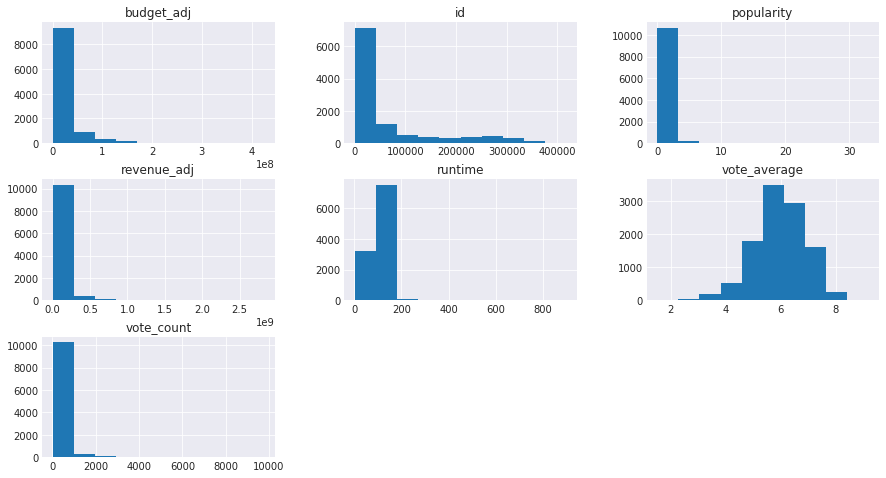

In [17]:
# Explore what the histogram of the data looks like
df.hist(figsize=(15,8));

### Q1: Which month is consider more Revenues for movies show?

In [18]:
#creat new column called "month", and extract the month from release_date
df['month']=df['release_date'].apply(lambda x: x.month)
df.head(2)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
0,135397,tt0369610,32.985763,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,1.379999e+08,3.481613e+08,5


In [19]:
#Groupby month and sum revenues
month_rev = df.groupby('month')['revenue_adj'].sum()
month_rev

month
1     4.874731e+10
2     4.214897e+10
3     6.380589e+10
4     5.487055e+10
5     8.418096e+10
6     1.020808e+11
7     7.982522e+10
8     5.742025e+10
9     6.788884e+10
10    7.393796e+10
11    8.171477e+10
12    1.089184e+11
Name: revenue_adj, dtype: float64

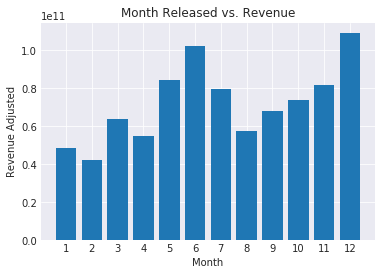

In [20]:
#Visulizing the most month revenues
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], month_rev, tick_label=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Month Released vs. Revenue')
plt.ylabel('Revenue Adjusted')
plt.xlabel('Month');

From this chart can notice June and December have the highest revenues, to be fair in our analysis need to check the number of movies displayed each month  

In [21]:
#Value counts of movies in each month
df['month'].value_counts()

9     1328
10    1147
12     981
8      915
1      912
6      826
3      821
11     814
5      808
7      798
4      797
2      687
Name: month, dtype: int64

In [22]:
#Average movies display in month
df['month'].value_counts().mean()

902.83333333333337

By calculating number of movies per month found it ranged between 1328 and 687 that not far from its average 902.83. So we still consider June and December have the highest revenues that number of movies per month not effect.


### Q 2: What's The Relation Between Revenue & Budget? 

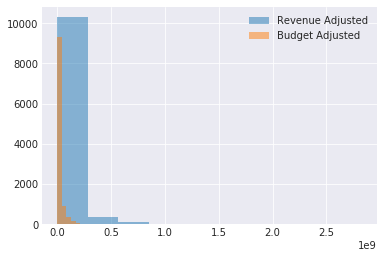

In [23]:
#Plot relation between Budget and Revenue
df.revenue_adj.hist(alpha=0.5, label ='Revenue Adjusted')
df.budget_adj.hist(alpha=0.5, label ='Budget Adjusted')
plt.legend();


From this correlation plot notes that both of them skewed to right, and by increasing budget got more revenues   

### Q3: What is the Relationship between Runtime & Vote Average?

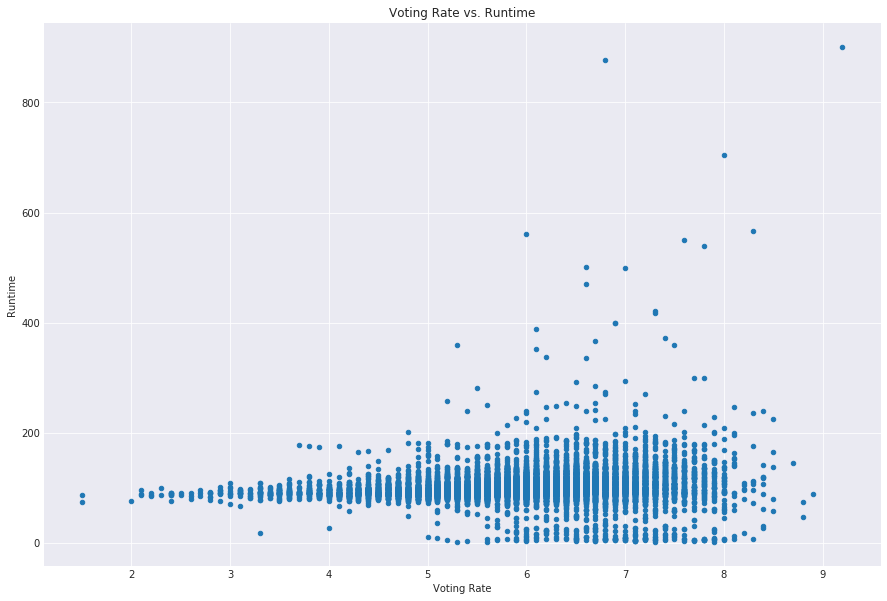

In [24]:
# Plotting scatter plot for Vote Average and Runtime
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('Voting Rate vs. Runtime')
plt.ylabel('Runtime')
plt.xlabel('Voting Rate');        

From this plot found voting for short movies have mid to high rating, the movies around 100 mins its voting is more spread from low to high, voting below 100 mins mid to high, and long movies got higher than average.

### Q4: What kind of properties are associated with movies that have high revenues?

In [25]:
#Calculate and Sort the biggest revenue
sorted_revenue_biggest= df.sort_values(by=['revenue_adj'],ascending =False).head(400)
sorted_revenue_biggest.head(3)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
1386,19995,tt0499549,9.432768,Avatar,162.0,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,8458,7.1,2.408869e+08,2.827124e+09,12
1329,11,tt0076759,12.037933,Star Wars,121.0,"[Adventure, Action, Science Fiction]",1977-03-20,4428,7.9,3.957559e+07,2.789712e+09,3
5231,597,tt0120338,4.355219,Titanic,194.0,"[Drama, Romance, Thriller]",1997-11-18,4654,7.3,2.716921e+08,2.506406e+09,11


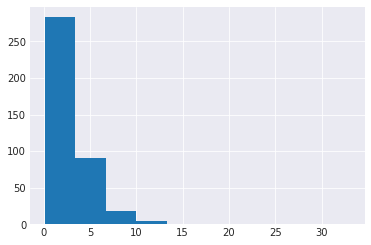

In [26]:
#Plotting the relation between biggest revenue and popularity
sorted_revenue_biggest.popularity.hist();

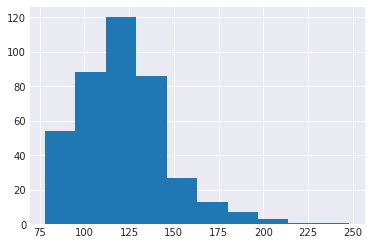

In [27]:
#Plotting the relation between biggest revenue and Runtime
sorted_revenue_biggest.runtime.hist();

In [28]:
#Calculating and sorting the shortest movies and displaying the shortest 400 movies and its popularity  
shorter_movies= df.sort_values(by=['runtime'],ascending =False).head(400)
runtime= shorter_movies['runtime']
popularity = shorter_movies['popularity']

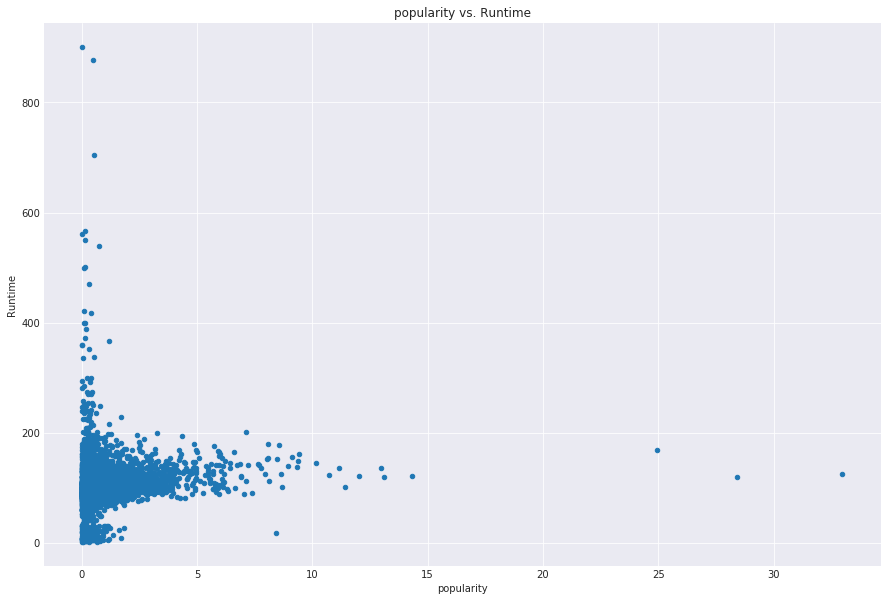

In [29]:
#plot scatter plot for popularity and runtime
#plt.scatter(runtime,popularity)
#plt.show;
df.plot(x='popularity', y='runtime', kind='scatter', figsize=(15,10))
plt.title('popularity vs. Runtime')
plt.ylabel('Runtime')
plt.xlabel('popularity'); 

By analysing and visulizing of some properties that reflected success of any film found high revenue, high popularity, and the popularity of movies duration are a good indication for success.
Increasing of movies popularity and desired movies run time reflect increasing of Revenue.

### Q5: Which genres are most popular?

In [30]:
#create new table with genres listed out by row
df_gen = df.genres.apply(pd.Series)
df_gen.head()


,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN


In [31]:
# dropping null values and display
df_gen.dropna(inplace = True)
df_gen.head()

,0,1,2,3,4
20,Action,Family,Science Fiction,Adventure,Mystery
37,Adventure,Animation,Comedy,Family,Fantasy
38,Action,Crime,Drama,Mystery,Thriller
46,Fantasy,Comedy,Animation,Science Fiction,Family
49,Thriller,Comedy,Drama,Romance,Science Fiction


In [32]:
# merge both table
df_gen=df.merge(df_gen,left_index=True,right_index=True)
df_gen.head(3)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month,0,1,2,3,4
20,158852,tt1964418,5.462138,Tomorrowland,130.0,"[Action, Family, Science Fiction, Adventure, M...",2015-05-19,1899,6.2,1.747999e+08,1.923127e+08,5,Action,Family,Science Fiction,Adventure,Mystery
37,105864,tt1979388,3.339135,The Good Dinosaur,93.0,"[Adventure, Animation, Comedy, Family, Fantasy]",2015-11-14,1087,6.6,1.609999e+08,3.053719e+08,11,Adventure,Animation,Comedy,Family,Fantasy
38,241554,tt2199571,3.237370,Run All Night,114.0,"[Action, Crime, Drama, Mystery, Thriller]",2015-03-11,814,6.3,4.599998e+07,6.583668e+07,3,Action,Crime,Drama,Mystery,Thriller


In [33]:
# pivot genres from columns into rows
df_gen = df_gen.melt(id_vars=['id','imdb_id', 'popularity', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj','month'],value_name="genre")
df_gen.head()

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month,variable,genre
0,158852,tt1964418,5.462138,Tomorrowland,130.0,"[Action, Family, Science Fiction, Adventure, M...",2015-05-19,1899,6.2,1.747999e+08,1.923127e+08,5,0,Action
1,105864,tt1979388,3.339135,The Good Dinosaur,93.0,"[Adventure, Animation, Comedy, Family, Fantasy]",2015-11-14,1087,6.6,1.609999e+08,3.053719e+08,11,0,Adventure
2,241554,tt2199571,3.237370,Run All Night,114.0,"[Action, Crime, Drama, Mystery, Thriller]",2015-03-11,814,6.3,4.599998e+07,6.583668e+07,3,0,Action
3,228161,tt2224026,2.976436,Home,94.0,"[Fantasy, Comedy, Animation, Science Fiction, ...",2015-03-18,1060,6.9,1.241999e+08,3.393612e+08,3,0,Fantasy
4,254320,tt3464902,2.885126,The Lobster,118.0,"[Thriller, Comedy, Drama, Romance, Science Fic...",2015-10-08,638,6.6,3.679998e+06,8.339346e+06,10,0,Thriller


In [34]:
#remove unnecessary columns
df_gen.drop(['genres'],axis = 1,inplace=True)
df_gen.head(3)

,id,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,month,variable,genre
0,158852,tt1964418,5.462138,Tomorrowland,130.0,2015-05-19,1899,6.2,1.747999e+08,1.923127e+08,5,0,Action
1,105864,tt1979388,3.339135,The Good Dinosaur,93.0,2015-11-14,1087,6.6,1.609999e+08,3.053719e+08,11,0,Adventure
2,241554,tt2199571,3.237370,Run All Night,114.0,2015-03-11,814,6.3,4.599998e+07,6.583668e+07,3,0,Action


In [35]:
#calculating the popularity of each gener
genres_popularity = df_gen.groupby(['genre'])['popularity'].mean()
print(genres_popularity)

genre
Action             0.850323
Adventure          0.913312
Animation          1.042616
Comedy             0.831021
Crime              0.653578
Documentary        0.154147
Drama              0.620248
Family             0.920478
Fantasy            0.909590
Foreign            0.201060
History            0.548782
Horror             0.603805
Music              0.636679
Mystery            0.791877
Romance            0.647811
Science Fiction    0.878831
TV Movie           0.341466
Thriller           0.781295
War                0.560611
Western            0.602005
Name: popularity, dtype: float64


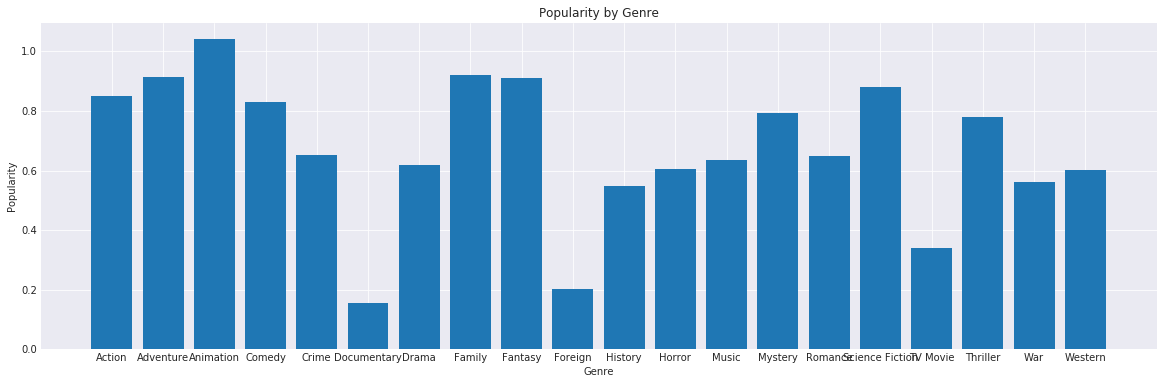

In [36]:
#Plotting the relation between popularity by genre 
plt.subplots(figsize=(20,6))
plt.bar(genres_popularity.index,genres_popularity)
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity');

By analysing found Animation movies is the top of popularity. then found Family, Adventure, and Fantasy.
The less popularity are Documentary, and Foreign movies.

### Q6: What's the top 10 movies profit? 

In [37]:
# Top 10 movies profit
top_rev = df.nlargest(10,'revenue_adj')
top_rev

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
1386,19995,tt0499549,9.432768,Avatar,162.0,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,8458,7.1,2.408869e+08,2.827124e+09,12
1329,11,tt0076759,12.037933,Star Wars,121.0,"[Adventure, Action, Science Fiction]",1977-03-20,4428,7.9,3.957559e+07,2.789712e+09,3
5231,597,tt0120338,4.355219,Titanic,194.0,"[Drama, Romance, Thriller]",1997-11-18,4654,7.3,2.716921e+08,2.506406e+09,11
10594,9552,tt0070047,2.010733,The Exorcist,122.0,"[Drama, Horror, Thriller]",1973-12-26,1113,7.2,3.928928e+07,2.167325e+09,12
9806,578,tt0073195,2.563191,Jaws,124.0,"[Horror, Thriller, Adventure]",1975-06-18,1415,7.3,2.836275e+07,1.907006e+09,6
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136.0,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,1.839999e+08,1.902723e+09,12
8889,601,tt0083866,2.900556,E.T. the Extra-Terrestrial,115.0,"[Science Fiction, Adventure, Family, Fantasy]",1982-04-03,1830,7.2,2.372625e+07,1.791694e+09,4
8094,1642,tt0113957,1.136610,The Net,114.0,"[Crime, Drama, Mystery, Thriller, Action]",1995-07-28,201,5.6,3.148127e+07,1.583050e+09,7
10110,12230,tt0055254,2.631987,One Hundred and One Dalmatians,79.0,"[Adventure, Animation, Comedy, Family]",2061-01-25,913,6.6,2.917944e+07,1.574815e+09,1
4361,24428,tt0848228,7.637767,The Avengers,143.0,"[Science Fiction, Action, Adventure]",2012-04-25,8903,7.3,2.089437e+08,1.443191e+09,4


Top 10 movies profit are (Avatar, Star Wars, Titanic, The Exorcist, Jaws, Star Wars: The Force Awakens, E.T. the Extra-Terrestrial, The Net, One Hundred and One Dalmatians, The Avengers).

### Q7: Which genres are most revenue?

In [38]:
#calculating the average revenue of each gener
genres_revenues = df_gen.groupby(['genre'])['revenue_adj'].mean()
print(genres_revenues)

genre
Action             1.127115e+08
Adventure          1.265604e+08
Animation          1.666168e+08
Comedy             1.248934e+08
Crime              9.560755e+07
Documentary        5.136436e+07
Drama              8.612261e+07
Family             1.441839e+08
Fantasy            1.358099e+08
Foreign            4.414887e+07
History            6.956343e+07
Horror             7.398552e+07
Music              1.192558e+08
Mystery            9.859014e+07
Romance            9.224177e+07
Science Fiction    9.983278e+07
TV Movie           5.136436e+07
Thriller           1.005423e+08
War                8.807437e+07
Western            8.088461e+07
Name: revenue_adj, dtype: float64


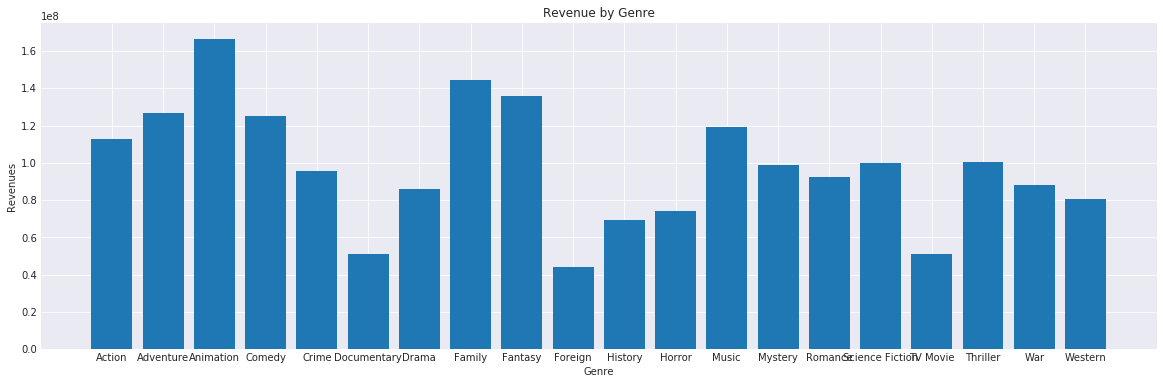

In [39]:
#Plotting the relation between Revenue by genre 
plt.subplots(figsize=(20,6))
plt.bar(genres_revenues.index,genres_revenues)
plt.title('Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenues');

By analysing found Animation movies is the top of revenues. then found Family, Fantasy, and Adventure.
The less revenues are Foreign, and Documentary movies.

<a id='conclusions'></a>
## Conclusions
By study of our data found To increase revenues of movies need to select the time of show that found in June and December when holidays and christmas, also found the duration of movie is most important where most of people favourite short and mid movies.
Found animation, family, adventure, and fantasy are attractive that reflected in revenue and popularity.
To achieve high revenues with high quality need good budget.
We can found all of these points in more details as follow:

From plotting notice June and December have the highest revenues, to be fair in our analysis need to check the number of movies displayed each month.

By calculating number of movies per month found it ranged between 1328 and 687 that not far from its average 902.83. So we still consider June and December have the highest revenues that number of movies per month not effect.

From plot notes that both of budget and revenues skewed to right that mean more than median, and by increasing budget got more revenues.

Also found voting for short movies have mid to high rating, the movies around 100 mins its voting is more spread from low to high, voting below 100 mins mid to high, and long movies got higher than average.

By analysing and visulizing of some properties that reflected success of any film found high revenue, high popularity, and the popularity of movies duration are a good indication for success.
Increasing of movies popularity and desired movies run time reflect increasing of Revenue.

By analysing found Animation movies is the top of popularity. then found Family, Adventure, and Fantasy.
The less popularity are Documentary, and Foreign movies.

Top 10 movies profit are (Avatar, Star Wars, Titanic, The Exorcist, Jaws,Star Wars: The Force Awakens, E.T. the Extra-Terrestrial, The Net, One Hundred and One Dalmatians, The Avengers).

Found Animation movies is the top of revenues. then found Family, Fantasy, and Adventure.
The less revenues are Foreign, and Documentary movies.

#### Limitations:
         We can discuss 3 points that represent some hinders around genres columns when start treating with genres columns
         
-By intending to make statics for genres column, and starting to turn from string to series for analysing data found unexpected results, so took time to find the reason, at last found
"|" symbol so I came back to remove this symbol.

-After turning into series found null values so need to remove these null value.

-So I found two problems that let me not intrust about my data analysis:
    
    First one found each film has more than one genre so I'm not sure each film belong to which one exactly, so found lack of accuracy.
    
    Second point because of removing null values for genre set also cause less of accuracy.
    
    As I displayed above the relation between genre and popularity, and relation between genre and revenue found the results close to the each other.
    to clear my point about revenue of movies add a question top ten movies revinue that clarify the most revenues by the name of movies. 













In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0